In [77]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, ConfusionMatrixDisplay
from xgboost import XGBClassifier
import seaborn as sns




## Carga de datos

In [4]:
df_concretadas = pd.read_parquet('../data/silver/transacciones_concretadas.parquet')
df_canceladas = pd.read_parquet('../data/silver/transacciones_canceladas.parquet')

# ETL

In [5]:
print(df_canceladas.columns)

Index(['TransactionNo', 'Date', 'ProductNo', 'ProductName', 'Price',
       'Quantity', 'CustomerNo', 'Country'],
      dtype='object')


In [6]:
df_canceladas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8494 entries, 0 to 8493
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   TransactionNo  8494 non-null   object 
 1   Date           8494 non-null   object 
 2   ProductNo      8494 non-null   object 
 3   ProductName    8494 non-null   object 
 4   Price          8494 non-null   float64
 5   Quantity       8494 non-null   int64  
 6   CustomerNo     8494 non-null   int32  
 7   Country        8494 non-null   object 
dtypes: float64(1), int32(1), int64(1), object(5)
memory usage: 497.8+ KB


In [7]:
print(df_canceladas.describe())

             Price      Quantity    CustomerNo
count  8494.000000   8494.000000   8494.000000
mean     14.667710    -31.496586  14994.995526
std      25.241861   1197.896194   1706.171419
min       5.460000 -80995.000000  12346.000000
25%      11.340000     -6.000000  13520.750000
50%      12.860000     -2.000000  14901.500000
75%      15.320000     -1.000000  16393.000000
max     660.620000     -1.000000  18282.000000


In [8]:
df_canceladas.head()

,TransactionNo,Date,ProductNo,ProductName,Price,Quantity,CustomerNo,Country
0,C581484,12/9/2019,23843,Paper Craft Little Birdie,6.19,-80995,16446,United Kingdom
1,C581490,12/9/2019,22178,Victorian Glass Hanging T-Light,6.19,-12,14397,United Kingdom
2,C581490,12/9/2019,23144,Zinc T-Light Holder Stars Small,6.04,-11,14397,United Kingdom
3,C581568,12/9/2019,21258,Victorian Sewing Box Large,6.19,-5,15311,United Kingdom
4,C581569,12/9/2019,84978,Hanging Heart Jar T-Light Holder,6.19,-1,17315,United Kingdom


In [9]:
df_concretadas.head()

,TransactionNo,Date,ProductNo,ProductName,Price,Quantity,CustomerNo,Country
0,581482,12/9/2019,22485,Set Of 2 Wooden Market Crates,21.47,12,17490,United Kingdom
1,581475,12/9/2019,22596,Christmas Star Wish List Chalkboard,10.65,36,13069,United Kingdom
2,581475,12/9/2019,23235,Storage Tin Vintage Leaf,11.53,12,13069,United Kingdom
3,581475,12/9/2019,23272,Tree T-Light Holder Willie Winkie,10.65,12,13069,United Kingdom
4,581475,12/9/2019,23239,Set Of 4 Knick Knack Tins Poppies,11.94,6,13069,United Kingdom


In [10]:
df_canceladas['Date'] = pd.to_datetime(df_canceladas['Date'], format='%m/%d/%Y')

In [11]:
df_canceladas['DayOfWeek'] = df_canceladas['Date'].dt.day_name()

abandonos_por_dia = df_canceladas['DayOfWeek'].value_counts()
print(abandonos_por_dia)


DayOfWeek
Sunday       2229
Saturday     1642
Friday       1554
Thursday     1400
Monday       1223
Wednesday     446
Name: count, dtype: int64


In [12]:
productos_abandonados = df_canceladas['ProductName'].value_counts().head(10)
print(productos_abandonados)


ProductName
Regency Cakestand 3 Tier            180
Jam Making Set With Jars             86
Set Of 3 Cake Tins Pantry Design     72
Strawberry Ceramic Trinket Pot       60
Roses Regency Teacup And Saucer      53
Popcorn Holder                       50
Recipe Box Pantry Yellow Design      47
Jumbo Bag Red Retrospot              44
Lunch Bag Red Retrospot              42
Green Regency Teacup And Saucer      42
Name: count, dtype: int64


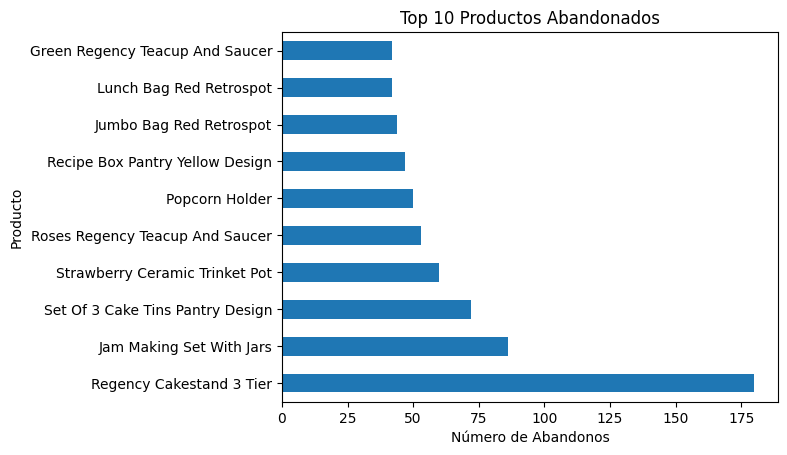

In [13]:
productos_abandonados = df_canceladas['ProductName'].value_counts().head(10)



productos_abandonados.plot(kind='barh')
plt.title('Top 10 Productos Abandonados')
plt.xlabel('Número de Abandonos')
plt.ylabel('Producto')
plt.show()


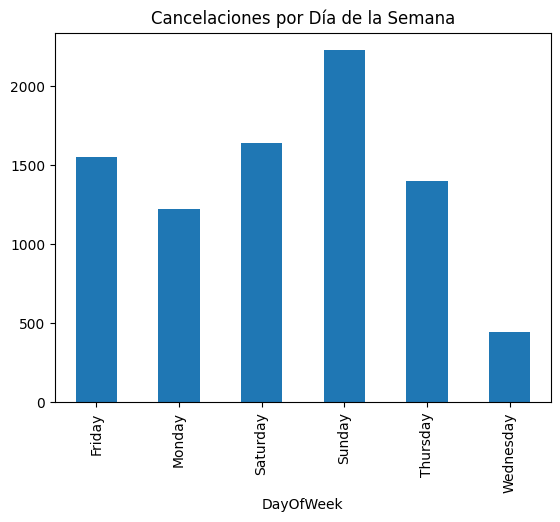

In [14]:
df_canceladas['DayOfWeek'] = df_canceladas['Date'].dt.day_name()
df_canceladas['DayOfWeek'].value_counts().sort_index().plot(kind='bar', title='Cancelaciones por Día de la Semana')
plt.show()

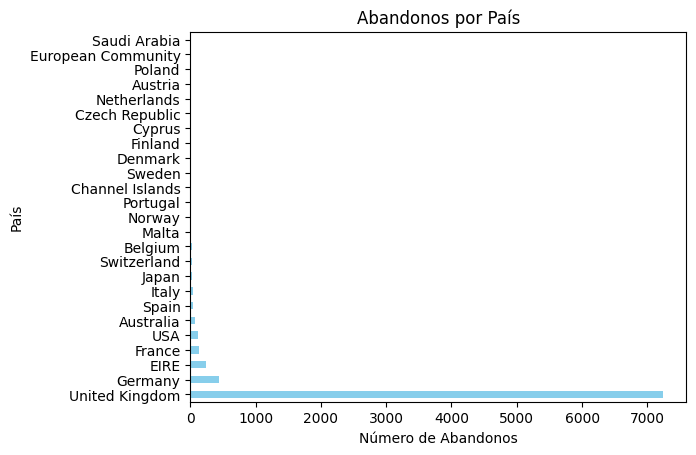

In [15]:
abandonos_por_pais = df_canceladas['Country'].value_counts()

abandonos_por_pais.plot(kind='barh', color='skyblue')
plt.title('Abandonos por País')
plt.xlabel('Número de Abandonos')
plt.ylabel('País')
plt.show()

In [16]:
df_canceladas['Country'].value_counts()

Country
United Kingdom        7234
Germany                435
EIRE                   241
France                 132
USA                    112
Australia               73
Spain                   44
Italy                   37
Japan                   34
Switzerland             33
Belgium                 32
Malta                   14
Norway                  11
Portugal                10
Channel Islands          9
Sweden                   9
Denmark                  8
Finland                  6
Cyprus                   6
Czech Republic           4
Netherlands              4
Austria                  3
Poland                   1
European Community       1
Saudi Arabia             1
Name: count, dtype: int64

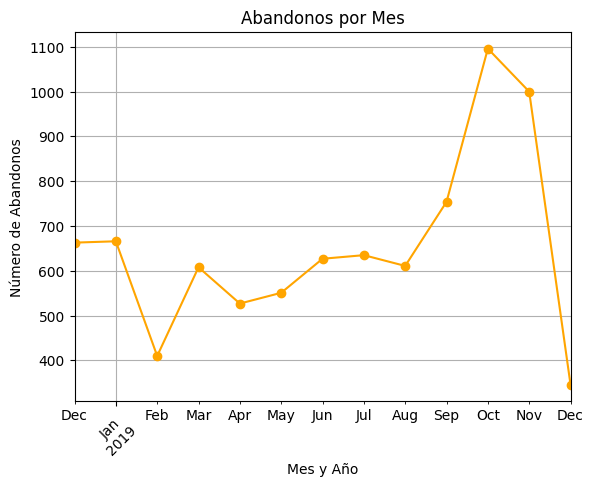

In [17]:
df_canceladas['YearMonth'] = df_canceladas['Date'].dt.to_period('M')

abandonos_por_mes = df_canceladas['YearMonth'].value_counts().sort_index()

abandonos_por_mes.plot(kind='line', marker='o', color='orange')
plt.title('Abandonos por Mes')
plt.xlabel('Mes y Año')
plt.ylabel('Número de Abandonos')
plt.xticks(rotation=45)
plt.grid()
plt.show()

In [18]:
df_concretadas['Date'] = pd.to_datetime(df_concretadas['Date'], format='%m/%d/%Y')
df_concretadas['DayOfWeek'] = df_concretadas['Date'].dt.day_name()

concretadas_por_dia = df_concretadas['DayOfWeek'].value_counts()
print(concretadas_por_dia)

DayOfWeek
Sunday       99706
Friday       98406
Thursday     92027
Saturday     91038
Monday       79226
Wednesday    62198
Name: count, dtype: int64


In [19]:
productos_comprados = df_concretadas['ProductName'].value_counts().head(10)
print(productos_comprados)

ProductName
Cream Hanging Heart T-Light Holder    2324
Jumbo Bag Red Retrospot               2112
Regency Cakestand 3 Tier              2010
Party Bunting                         1701
Lunch Bag Red Retrospot               1584
Assorted Colour Bird Ornament         1478
Popcorn Holder                        1419
Set Of 3 Cake Tins Pantry Design      1392
Pack Of 72 Retrospot Cake Cases       1355
Lunch Bag Suki Design                 1308
Name: count, dtype: int64


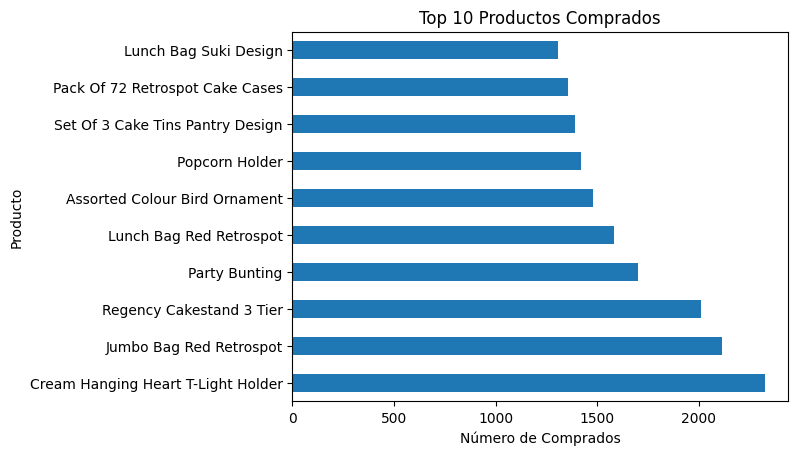

In [20]:

productos_comprados.plot(kind='barh')
plt.title('Top 10 Productos Comprados')
plt.xlabel('Número de Comprados')
plt.ylabel('Producto')
plt.show()


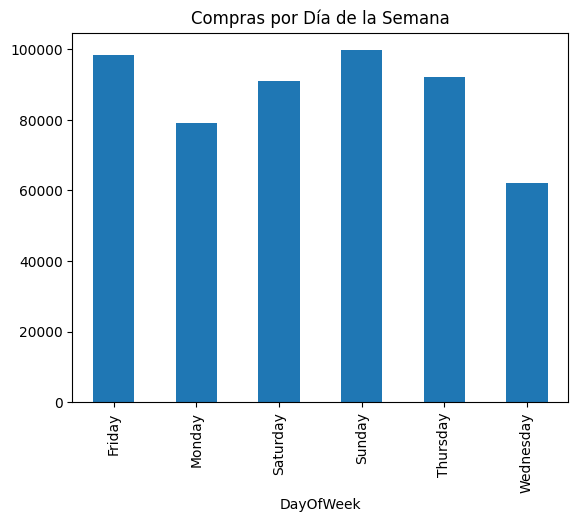

In [21]:
df_concretadas['DayOfWeek'] = df_concretadas['Date'].dt.day_name()
df_concretadas['DayOfWeek'].value_counts().sort_index().plot(kind='bar', title='Compras por Día de la Semana')
plt.show()

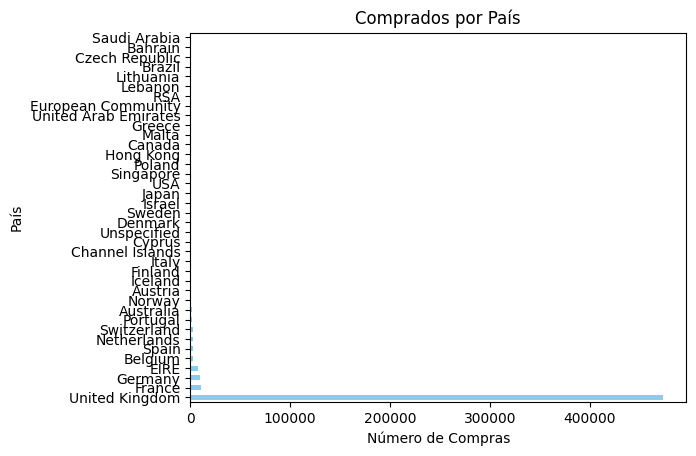

In [22]:

comprados_por_pais = df_concretadas['Country'].value_counts()

comprados_por_pais.plot(kind='barh', color='skyblue')
plt.title('Comprados por País')
plt.xlabel('Número de Compras')
plt.ylabel('País')
plt.show()

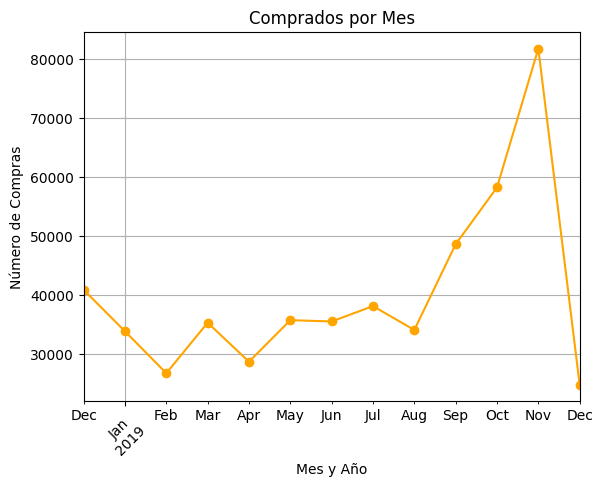

In [23]:
df_concretadas['YearMonth'] = df_concretadas['Date'].dt.to_period('M')

comprados_por_mes = df_concretadas['YearMonth'].value_counts().sort_index()

comprados_por_mes.plot(kind='line', marker='o', color='orange')
plt.title('Comprados por Mes')
plt.xlabel('Mes y Año')
plt.ylabel('Número de Compras')
plt.xticks(rotation=45)
plt.grid()
plt.show()

In [24]:
df_canceladas['Quantity'] = df_canceladas['Quantity'] * -1
df_canceladas['Quantity'].head()

0    80995
1       12
2       11
3        5
4        1
Name: Quantity, dtype: int64

In [25]:
df_canceladas['Total'] = df_canceladas['Price'] * df_canceladas['Quantity']

total_por_carrito_cancelado = df_canceladas.groupby('TransactionNo')['Total'].sum().reset_index()

total_por_carrito_cancelado.rename(columns={'Total': 'Total_Carrito_Cancelado'}, inplace=True)

print(total_por_carrito_cancelado.head())

  TransactionNo  Total_Carrito_Cancelado
0       C536383                    15.02
1       C536391                  1498.20
2       C536506                    87.66
3       C536543                    34.64
4       C536548                   535.33


In [26]:
df_concretadas['Total'] = df_concretadas['Price'] * df_concretadas['Quantity']

total_por_carrito_completado = df_concretadas.groupby('TransactionNo')['Total'].sum().reset_index()

total_por_carrito_completado.rename(columns={'Total': 'Total_Carrito_Completado'}, inplace=True)

print(total_por_carrito_completado.head())

  TransactionNo  Total_Carrito_Completado
0        536365                    552.52
1        536366                    145.80
2        536367                   1136.34
3        536368                    225.54
4        536369                     49.05


In [27]:
df_concretadas['Quantity'].head()

0    12
1    36
2    12
3    12
4     6
Name: Quantity, dtype: int64

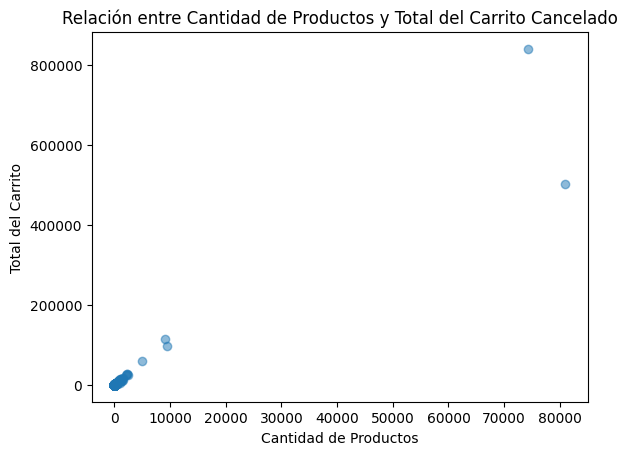

In [28]:
plt.scatter(df_canceladas.groupby('TransactionNo')['Quantity'].sum(), total_por_carrito_cancelado['Total_Carrito_Cancelado'], alpha=0.5)
plt.title('Relación entre Cantidad de Productos y Total del Carrito Cancelado')
plt.xlabel('Cantidad de Productos')
plt.ylabel('Total del Carrito')
plt.show()


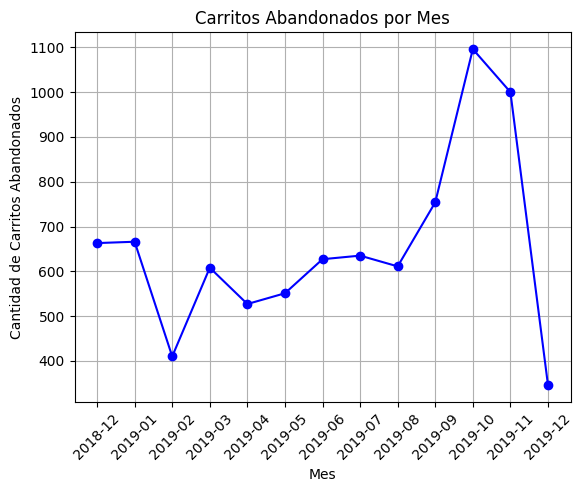

In [29]:
abandonos_por_mes = df_canceladas.groupby('YearMonth')['TransactionNo'].count().reset_index()

abandonos_por_mes.rename(columns={'TransactionNo': 'Cantidad_Carritos_Abandonados'}, inplace=True)

plt.plot(abandonos_por_mes['YearMonth'].astype(str), abandonos_por_mes['Cantidad_Carritos_Abandonados'], marker='o', linestyle='-', color='b')
plt.title('Carritos Abandonados por Mes')
plt.xlabel('Mes')
plt.ylabel('Cantidad de Carritos Abandonados')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

## Pipelines

In [30]:
df_canceladas['Abandonado'] = 1  # Carritos cancelados (1)
df_concretadas['Abandonado'] = 0  # Carritos completados (0)

df_combined = pd.concat([df_canceladas, df_concretadas], ignore_index=True)


In [31]:
df_combined = df_combined[['Date', 'ProductNo', 'Quantity', 'Price', 'CustomerNo', 'Country', 'Abandonado']]

df_combined['Date'] = pd.to_datetime(df_combined['Date'], format='%m/%d/%Y')


In [32]:
df_combined['Total'] = df_combined['Price'] * df_combined['Quantity'].abs()  # Asegurarse de que Quantity sea positivo


In [33]:
X = df_combined.drop(columns=['Abandonado'])
y = df_combined['Abandonado']


In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

num_features = ['Quantity', 'Price', 'Total']  # Colocar aquí las columnas numéricas
cat_features = ['ProductNo', 'CustomerNo', 'Country']  # Colocar aquí las columnas categóricas

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_features)  # Manejar categorías desconocidas
    ]
)

In [35]:
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Quantity', 'Price',
                                                   'Total']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['ProductNo', 'CustomerNo',
                                                   'Country'])])),
                ('classifier', RandomForestClassifier(random_state=42))])

## Matriz de confusión: el modelo predijo correctamente 104140 carritos completados. 340 carritos abandonados
## Cometió 414 errores al predecir carritos completados como abandonados y 1325 errores al predecir carritos abandonados.
## El reporte muestra que la precisión para los completados (0) es muy alta 0.99, para los abandonados (1) es baja 0.45, Recall es bastante bajo 0.20 indica que el modelo capturo solo una parte de los datos reales. Y en exactitud general es 0.98 alta pero es engañoso ya que toma en su mayoria a los completados.


In [36]:
y_pred = model.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[104140    414]
 [  1325    340]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99    104554
           1       0.45      0.20      0.28      1665

    accuracy                           0.98    106219
   macro avg       0.72      0.60      0.64    106219
weighted avg       0.98      0.98      0.98    106219



In [39]:
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', XGBClassifier(random_state=42, eval_metric='logloss'))
])


In [40]:
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Quantity', 'Price',
                                                   'Total']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['ProductNo', 'CustomerNo',
                                                   'Country'])])),
                ('classifier',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None, device...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, random_state=42, ...))])

## Completadas(0) precisión 99%, recall 1,00 identifico casi todos los carritos.
## Abandonadas(1) precisión 87%, recall 0,08 identifico el 8% de los abandonados.
## El bajo recall para Abandonados(1) indica que el modelo tiene dificultades para detectarlos, ya que muchos de ellos están siendo clasificados incorrectamente como completados.

In [41]:
model.fit(X_train, y_train)

# Hacer predicciones y evaluar
y_pred = model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[104535     19]
 [  1536    129]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99    104554
           1       0.87      0.08      0.14      1665

    accuracy                           0.99    106219
   macro avg       0.93      0.54      0.57    106219
weighted avg       0.98      0.99      0.98    106219



In [42]:
from collections import Counter

counter = Counter(y_train)
scale_pos_weight = counter[0] / counter[1]

In [43]:
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', XGBClassifier(random_state=42, scale_pos_weight=scale_pos_weight))
])

In [44]:
model.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Quantity', 'Price',
                                                   'Total']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['ProductNo', 'CustomerNo',
                                                   'Country'])])),
                ('classifier',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None, device...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, random_state=42, ...))])

# El resultado muestra una mejora en la capacidad del modelo para identificar la clase minoritaria (carritos abandonados), ya que el recall para la clase 1 ha subido al 66%. Sin embargo, la precisión es baja (6%), lo que indica que hay muchos falsos positivos (predicciones incorrectas de carritos abandonados).

In [45]:
y_pred = model.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[87781 16773]
 [  566  1099]]
              precision    recall  f1-score   support

           0       0.99      0.84      0.91    104554
           1       0.06      0.66      0.11      1665

    accuracy                           0.84    106219
   macro avg       0.53      0.75      0.51    106219
weighted avg       0.98      0.84      0.90    106219



In [76]:
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', XGBClassifier(random_state=42, scale_pos_weight=scale_pos_weight * 1, max_depth=5, learning_rate=0.1, n_estimators=100))
])

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[82199 22355]
 [  619  1046]]
              precision    recall  f1-score   support

           0       0.99      0.79      0.88    104554
           1       0.04      0.63      0.08      1665

    accuracy                           0.78    106219
   macro avg       0.52      0.71      0.48    106219
weighted avg       0.98      0.78      0.86    106219



In [78]:

svm_model = SVC(random_state=42)

svm_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor), 
    ('classifier', svm_model)
])

svm_pipeline.fit(X_train, y_train)

y_pred_svm = svm_pipeline.predict(X_test)

print(confusion_matrix(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))

[[104553      1]
 [  1660      5]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99    104554
           1       0.83      0.00      0.01      1665

    accuracy                           0.98    106219
   macro avg       0.91      0.50      0.50    106219
weighted avg       0.98      0.98      0.98    106219



In [86]:
from lightgbm import LGBMClassifier

model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LGBMClassifier(random_state=42))
])

model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[LightGBM] [Info] Number of positive: 6829, number of negative: 418047
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.022350 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 12885
[LightGBM] [Info] Number of data points in the train set: 424876, number of used features: 6124
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.016073 -> initscore=-4.114416
[LightGBM] [Info] Start training from score -4.114416
[[104524     30]
 [  1497    168]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99    104554
           1       0.85      0.10      0.18      1665

    accuracy                           0.99    106219
   macro avg       0.92      0.55      0.59    106219
weighted avg       0.98      0.99      0.98    106219



# Hiperparametros

In [88]:
from sklearn.model_selection import GridSearchCV
from lightgbm import LGBMClassifier
from sklearn.pipeline import Pipeline

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LGBMClassifier(random_state=42))
])

param_grid = {
    'classifier__num_leaves': [31, 50, 70],
    'classifier__max_depth': [-1, 10, 20],
    'classifier__learning_rate': [0.01, 0.05, 0.1],
    'classifier__n_estimators': [100, 200, 300]
}

grid_search = GridSearchCV(pipeline, param_grid, scoring='f1', cv=5, n_jobs=-1)

grid_search.fit(X_train, y_train)

print("Mejores hiperparámetros:", grid_search.best_params_)

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


c:\Users\s4phulkx\Desktop\NoCountry\c21-57-t-data-bi\venv\Lib\site-packages\numpy\ma\core.py:2881: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


[LightGBM] [Info] Number of positive: 6829, number of negative: 418047
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.028620 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 12885
[LightGBM] [Info] Number of data points in the train set: 424876, number of used features: 6124
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.016073 -> initscore=-4.114416
[LightGBM] [Info] Start training from score -4.114416
Mejores hiperparámetros: {'classifier__learning_rate': 0.1, 'classifier__max_depth': -1, 'classifier__n_estimators': 300, 'classifier__num_leaves': 70}
[[104484     70]
 [  1336    329]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99    104554
           1       0.82      0.20      0.32      1665

    accuracy                           0.99    106219
   macro avg       0.91      0.60      0.66    106219
weighted avg       0.98      0.99      0.98

In [92]:
from sklearn.model_selection import RandomizedSearchCV
from lightgbm import LGBMClassifier
from sklearn.pipeline import Pipeline

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LGBMClassifier(random_state=42))
])

param_dist = {
    'classifier__num_leaves': [31, 50, 70, 100],
    'classifier__max_depth': [-1, 10, 20, 30],
    'classifier__learning_rate': [0.01, 0.05, 0.1, 0.2],
    'classifier__n_estimators': [100, 200, 300, 400],
    'classifier__min_child_weight': [0.001, 0.01, 0.1, 1],
    'classifier__feature_fraction': [0.6, 0.8, 1.0],
    'classifier__bagging_fraction': [0.6, 0.8, 1.0]
}

random_search = RandomizedSearchCV(
    pipeline, 
    param_dist, 
    scoring='f1', 
    cv=5, 
    n_jobs=-1, 
    n_iter=50, 
    random_state=42
)

random_search.fit(X_train, y_train)

print("Mejores hiperparámetros:", random_search.best_params_)

best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[LightGBM] [Warning] feature_fraction is set=0.6, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6
[LightGBM] [Warning] bagging_fraction is set=0.6, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6
[LightGBM] [Warning] feature_fraction is set=0.6, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6
[LightGBM] [Warning] bagging_fraction is set=0.6, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6
[LightGBM] [Info] Number of positive: 6829, number of negative: 418047
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.013428 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 12885
[LightGBM] [Info] Number of data points in the train set: 424876, number of used features: 6124
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.016073 -> initscore=-4.114416
[LightGBM]

In [93]:
from sklearn.model_selection import RandomizedSearchCV
from lightgbm import LGBMClassifier
from sklearn.pipeline import Pipeline

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LGBMClassifier(random_state=42))
])

param_dist = {
    'classifier__num_leaves': [50, 70, 100],
    'classifier__max_depth': [-1, 10],
    'classifier__learning_rate': [0.05, 0.1, 0.2],
    'classifier__n_estimators': [100, 200, 300]
}

random_search = RandomizedSearchCV(
    pipeline, 
    param_dist, 
    scoring='f1', 
    cv=5, 
    n_jobs=-1, 
    n_iter=20, 
    random_state=42
)

random_search.fit(X_train, y_train)

print("Mejores hiperparámetros:", random_search.best_params_)

best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


c:\Users\s4phulkx\Desktop\NoCountry\c21-57-t-data-bi\venv\Lib\site-packages\numpy\ma\core.py:2881: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


[LightGBM] [Info] Number of positive: 6829, number of negative: 418047
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.020598 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 12885
[LightGBM] [Info] Number of data points in the train set: 424876, number of used features: 6124
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.016073 -> initscore=-4.114416
[LightGBM] [Info] Start training from score -4.114416
Mejores hiperparámetros: {'classifier__num_leaves': 100, 'classifier__n_estimators': 300, 'classifier__max_depth': -1, 'classifier__learning_rate': 0.2}
[[104333    221]
 [  1213    452]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99    104554
           1       0.67      0.27      0.39      1665

    accuracy                           0.99    106219
   macro avg       0.83      0.63      0.69    106219
weighted avg       0.98      0.99      0.9

In [94]:
from sklearn.model_selection import RandomizedSearchCV
from lightgbm import LGBMClassifier
from sklearn.pipeline import Pipeline

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LGBMClassifier(random_state=42, class_weight='balanced'))
])

param_dist = {
    'classifier__num_leaves': [50, 70, 100],
    'classifier__max_depth': [-1, 10],
    'classifier__learning_rate': [0.05, 0.1, 0.2],
    'classifier__n_estimators': [100, 200, 300]
}

random_search = RandomizedSearchCV(
    pipeline, 
    param_dist, 
    scoring='f1', 
    cv=5, 
    n_jobs=-1, 
    n_iter=20, 
    random_state=42
)

random_search.fit(X_train, y_train)

print("Mejores hiperparámetros:", random_search.best_params_)

best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[LightGBM] [Info] Number of positive: 6829, number of negative: 418047
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.014079 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 12885
[LightGBM] [Info] Number of data points in the train set: 424876, number of used features: 6124
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
Mejores hiperparámetros: {'classifier__num_leaves': 100, 'classifier__n_estimators': 300, 'classifier__max_depth': -1, 'classifier__learning_rate': 0.2}
[[98184  6370]
 [  487  1178]]
              precision    recall  f1-score   support

           0       1.00      0.94      0.97    104554
           1       0.16      0.71      0.26      1665

    accuracy                           0.94    106219
   macro avg       0.58      0.82     

In [95]:
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LGBMClassifier(random_state=42, class_weight='balanced'))
])

random_search.fit(X_train, y_train)

best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[LightGBM] [Info] Number of positive: 6829, number of negative: 418047
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.014034 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 12885
[LightGBM] [Info] Number of data points in the train set: 424876, number of used features: 6124
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
[[98184  6370]
 [  487  1178]]
              precision    recall  f1-score   support

           0       1.00      0.94      0.97    104554
           1       0.16      0.71      0.26      1665

    accuracy                           0.94    106219
   macro avg       0.58      0.82      0.61    106219
weighted avg       0.98      0.94      0.96    106219



In [96]:
y_pred_proba = best_model.predict_proba(X_test)[:, 1]

new_threshold = 0.3
y_pred_adjusted = (y_pred_proba >= new_threshold).astype(int)

print(confusion_matrix(y_test, y_pred_adjusted))
print(classification_report(y_test, y_pred_adjusted))


[[91622 12932]
 [  307  1358]]
              precision    recall  f1-score   support

           0       1.00      0.88      0.93    104554
           1       0.10      0.82      0.17      1665

    accuracy                           0.88    106219
   macro avg       0.55      0.85      0.55    106219
weighted avg       0.98      0.88      0.92    106219



# red neuronal

In [139]:
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score


mlp = MLPClassifier(hidden_layer_sizes=(256, 128, 64, 32), activation='tanh', solver='adam', max_iter=200)

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', mlp)
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_features)  # Manejar categorías desconocidas
    ]
)

mlp.set_params(early_stopping=True, validation_fraction=0.1)
mlp.set_params(learning_rate_init=0.0005)  
mlp.set_params(alpha=0.01)  


pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', mlp)
])


pipeline.fit(X_train, y_train)


y_proba = pipeline.predict_proba(X_test)[:, 1]

threshold = 0.3  
y_pred = (y_proba >= threshold).astype(int)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
# Predicción y evaluación
#y_pred = pipeline.predict(X_test)
#print("Accuracy:", accuracy_score(y_test, y_pred))
#print("Classification Report:\n", classification_report(y_test, y_pred))



Accuracy: 0.9852286314124592
Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99    104554
           1       0.56      0.29      0.38      1665

    accuracy                           0.99    106219
   macro avg       0.77      0.64      0.69    106219
weighted avg       0.98      0.99      0.98    106219

